🧪Clasificación de Spam con SVM

Paso 1: Instala y carga las librerías necesarias

In [ ]:
# Paso 1: Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Paso 2: Cargar el dataset (Subir tu CSV)

In [ ]:
# Paso 2: Cargar dataset (asegúrate de subirlo primero)
df = pd.read_csv('spam_detection.csv')
print("spam_detection.csv")


spam_detection.csv


Paso 3: Visualización rápida

In [ ]:
# Paso 3: Selección de características
features = ['num_links', 'sender_score', 'all_caps']
X = df[features]
y = df['is_spam']

Paso 4: Separar datos y preparar para entrenamiento

In [ ]:
# Paso 4: Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Paso 5: Entrenar el modelo SVM

In [ ]:
# Paso 5: Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Paso 6: Evaluación del modelo

In [ ]:
# Paso 6: Entrenar el modelo
modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X_train, y_train)

SVC(kernel='linear')

Paso 7: Predicción con nuevos datos

In [ ]:
# Paso 7: Evaluar exactitud
y_pred = modelo_svm.predict(X_test)
print(f"🔍 Exactitud del modelo: {accuracy_score(y_test, y_pred)*100:.2f}%")

🔍 Exactitud del modelo: 90.77%


Paso 8: visualizacion de graficos

In [ ]:
# Paso 8: Predicción con correo nuevo (usando valores sospechosos)
print("\n--- Clasificación de correo nuevo ---")
num_links = int(input("Número de enlaces en el correo: "))
sender_score = float(input("Puntaje del remitente (0 a 1): "))
all_caps = int(input("¿Usa muchas mayúsculas? (1 = Sí, 0 = No): "))



--- Clasificación de correo nuevo ---
Número de enlaces en el correo: 2
Puntaje del remitente (0 a 1): 1
¿Usa muchas mayúsculas? (1 = Sí, 0 = No): 1


In [ ]:
# Crear y escalar entrada
nueva_entrada = pd.DataFrame([[num_links, sender_score, all_caps]], columns=features)
entrada_escalada = scaler.transform(nueva_entrada)

In [ ]:
# Predicción
resultado = modelo_svm.predict(entrada_escalada)
print("📨 Predicción:", "⚠️ SPAM" if resultado[0] == 1 else "✅ No SPAM")

📨 Predicción: ✅ No SPAM


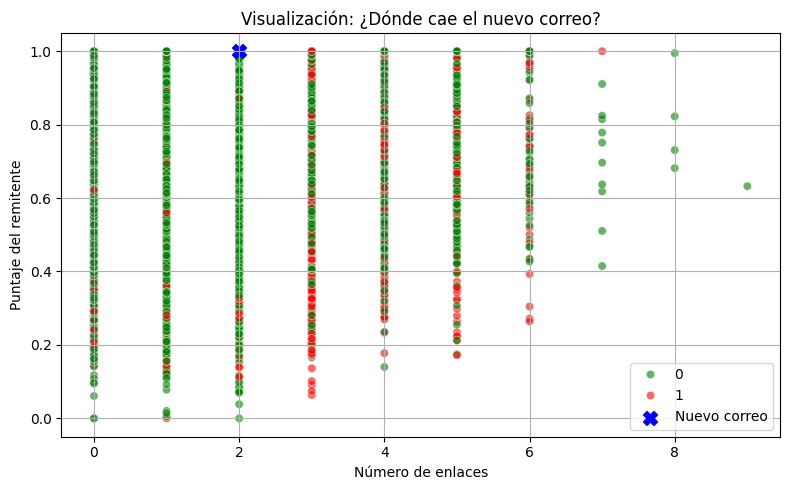

In [ ]:
# Paso 9: Visualizar gráficamente
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="num_links", y="sender_score", hue="is_spam", palette={0: "green", 1: "red"}, alpha=0.6)
plt.scatter(num_links, sender_score, color="blue", s=100, marker="X", label="Nuevo correo")
plt.title("Visualización: ¿Dónde cae el nuevo correo?")
plt.xlabel("Número de enlaces")
plt.ylabel("Puntaje del remitente")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

graficos

In [ ]:
# Estilo
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (8, 5)

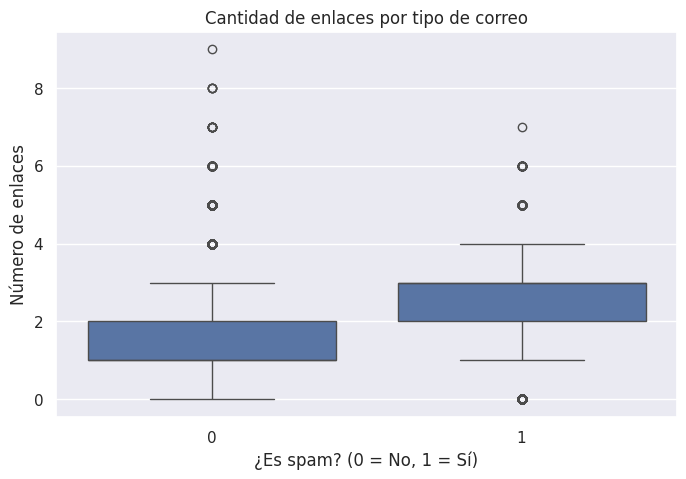

In [ ]:
# Gráfico 1: Enlaces
sns.boxplot(x="is_spam", y="num_links", data=df)
plt.title("Cantidad de enlaces por tipo de correo")
plt.xlabel("¿Es spam? (0 = No, 1 = Sí)")
plt.ylabel("Número de enlaces")
plt.savefig("grafico_num_links.png")
plt.show()

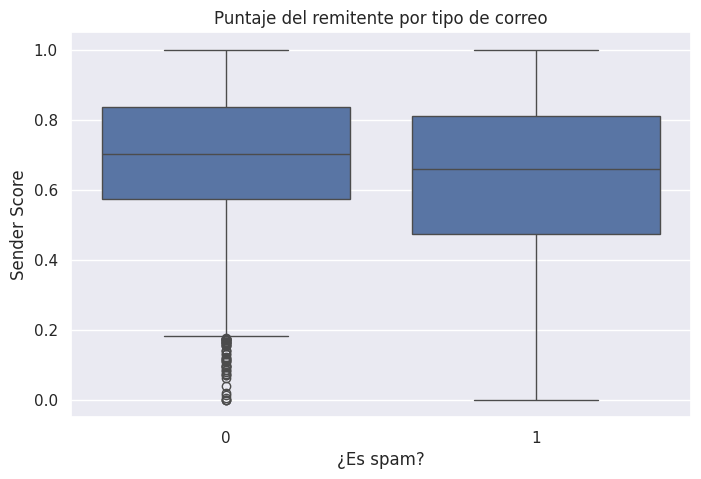

In [ ]:
# Gráfico 2: Puntaje del remitente
sns.boxplot(x="is_spam", y="sender_score", data=df)
plt.title("Puntaje del remitente por tipo de correo")
plt.xlabel("¿Es spam?")
plt.ylabel("Sender Score")
plt.savefig("grafico_sender_score.png")
plt.show()

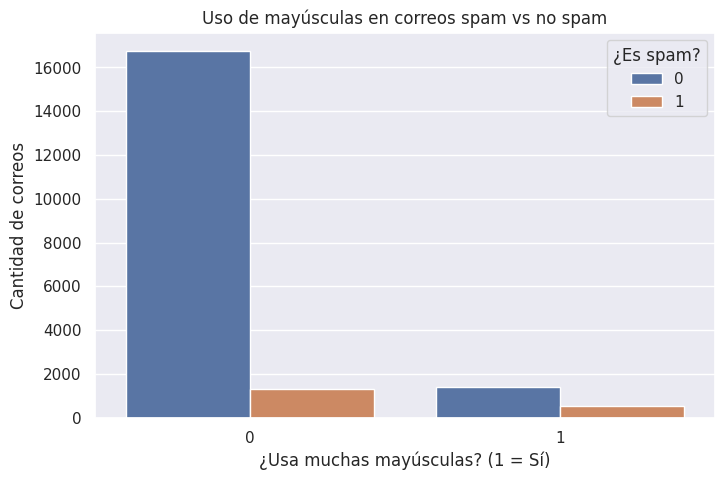

In [ ]:
# Gráfico 3: Mayúsculas
sns.countplot(x="all_caps", hue="is_spam", data=df)
plt.title("Uso de mayúsculas en correos spam vs no spam")
plt.xlabel("¿Usa muchas mayúsculas? (1 = Sí)")
plt.ylabel("Cantidad de correos")
plt.legend(title="¿Es spam?")
plt.savefig("grafico_all_caps.png")
plt.show()